In [132]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#pd.set_option('display.max_rows', 18) 


In [133]:
df = pd.read_csv('/kaggle/input/football-5/College Football - Sheet1 (4).csv')
df['% Greek'] = df['% Fraternity'] + df['% Fraternity']


In [134]:

def clean_and_convert_currency(currency):
    try:
        cleaned_value = float(currency.replace('$', '').replace(',', ''))
        return cleaned_value
    except:
        return None

df['Football Revenue'] = df['Football Revenue'].apply(clean_and_convert_currency)
df['Undergrad Enrollment'] = df['Undergrad Enrollment'].apply(clean_and_convert_currency)
df['Football Attendence'] = df['Football Attendence'].apply(clean_and_convert_currency)
df['Stadium Size'] = df['Stadium Size'].apply(clean_and_convert_currency)
df['Football Profit'] = df['Football Profit'].apply(clean_and_convert_currency)
df['Football Expenses'] = df['Football Expenses'].apply(clean_and_convert_currency)
df['Basketball Revenue'] = df['Basketball Revenue'].apply(clean_and_convert_currency)
df['Basketball Profit'] = df['Basketball Profit'].apply(clean_and_convert_currency)
df['Basketball Expenses'] = df['Basketball Expenses'].apply(clean_and_convert_currency)
df['Win Rate'] = df['Win Rate'].astype(str)
df['Win Rate'] = df['Win Rate'].str.rstrip('%').astype(float)
df['Wins/Years'] = df['All Time Wins']/df['Years Played']
df.dtypes


Rank                      int64
School                   object
State                    object
City                     object
Win Rate                float64
Conference               object
Football Revenue        float64
Football Profit         float64
Football Expenses       float64
Undergrad Enrollment    float64
Football Attendence     float64
Stadium Size            float64
% Fraternity            float64
% Sorority              float64
Basketball Revenue      float64
Basketball Profit       float64
Basketball Expenses     float64
All Time Wins             int64
Average Ticket Price      int64
Years Played              int64
State GDP M               int64
GDP Per Capita            int64
% Greek                 float64
Wins/Years              float64
dtype: object

In [135]:
#Average Difference between Football and Basketball Revenue
average_difference = (df['Football Revenue'] - df['Basketball Revenue']).mean()
print(f"Average Difference between Football and Basketball Revenue: ${average_difference:.2f}")

Average Difference between Football and Basketball Revenue: $30471903.10


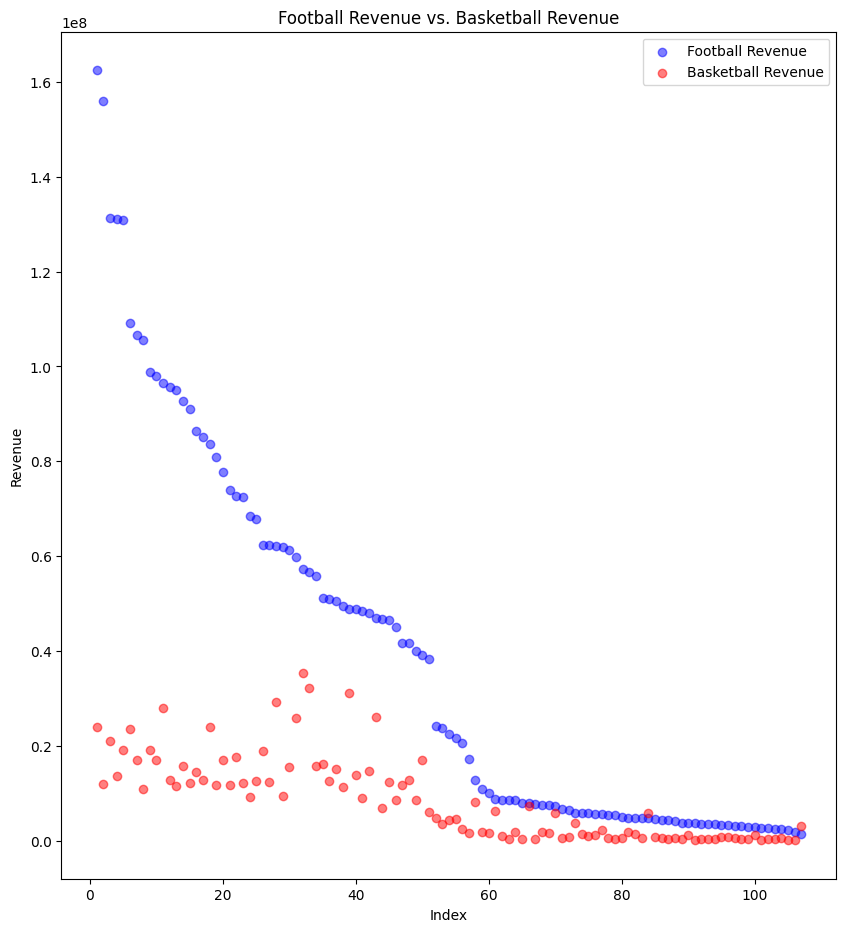

In [136]:
#Football Revenue vs. Basketball Revenue
x = df['Rank']
plt.figure(figsize=(10, 11))
plt.scatter(x, df['Football Revenue'], marker='o', color='b', alpha=0.5, label='Football Revenue')
plt.scatter(x, df['Basketball Revenue'], marker='o', color='r', alpha=0.5, label='Basketball Revenue')

plt.title('Football Revenue vs. Basketball Revenue')
plt.xlabel('Index')
plt.ylabel('Revenue')
plt.legend()
plt.show()


0.4861726758404888


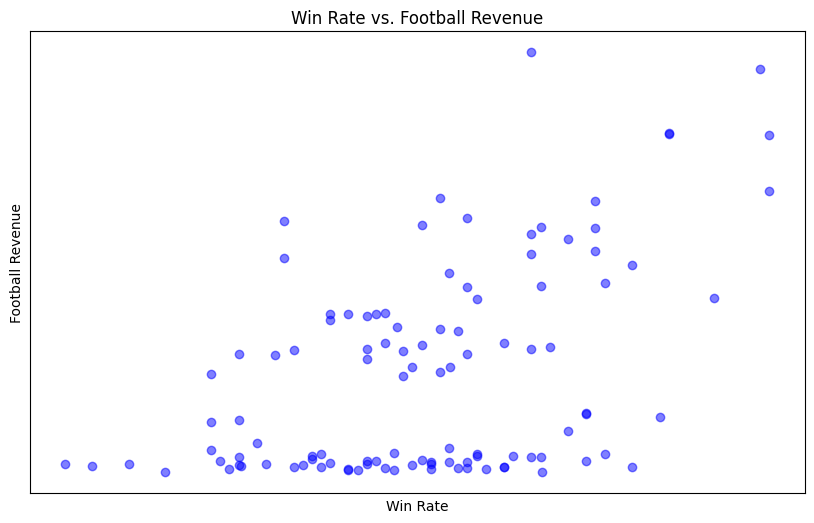

In [137]:
#Win Rate vs. Football Revenue
x = df['Win Rate']
y = df['Football Revenue']

plt.figure(figsize=(10, 6))
plt.scatter(x,y, marker='o', color='b', alpha=0.5)
plt.title('Win Rate vs. Football Revenue')
plt.xlabel('Win Rate')
plt.ylabel('Football Revenue')
plt.xticks([]) 
plt.yticks([])  

print(x.corr(df['Football Revenue']))
plt.show()

0.871688841193843


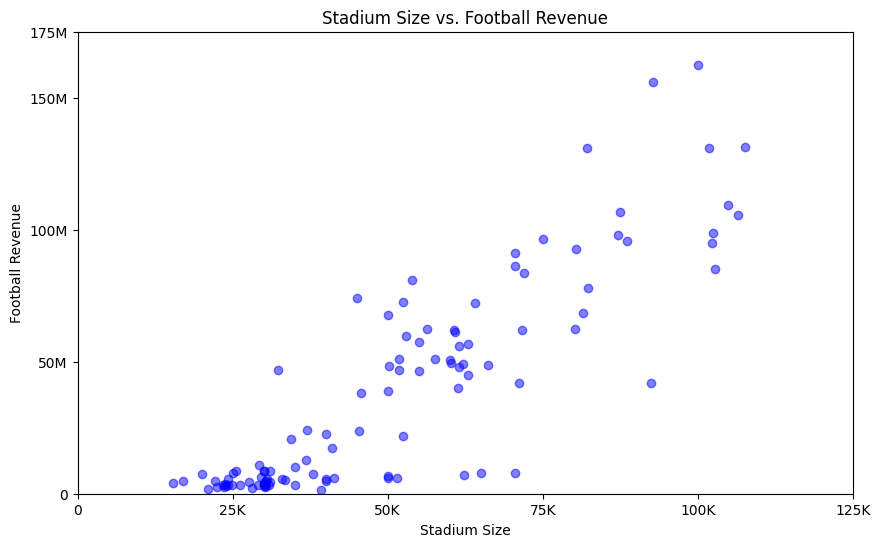

In [138]:
#Stadium Size vs. Football Revenue
x = df['Stadium Size']
y = df['Football Revenue']

plt.figure(figsize=(10, 6))
plt.scatter(x, y, marker='o', color='b', alpha=0.5)
plt.title('Stadium Size vs. Football Revenue')
plt.xlabel('Stadium Size')
plt.ylabel('Football Revenue')

plt.xlim(0, 100000)  # Set x-axis limits
plt.ylim(0, 165000000)  # Set y-axis limits

x_tick_positions = [0, 25000, 50000, 75000, 100000,125000]
x_tick_labels = ["0", "25K", "50K", "75K", "100K", '125K']
plt.xticks(x_tick_positions, x_tick_labels)

y_tick_positions = [0, 50000000, 100000000, 150000000, 175000000]
y_tick_labels = ["0", "50M", "100M", "150M", '175M']
plt.yticks(y_tick_positions, y_tick_labels)

print(x.corr(df['Football Revenue']))
plt.show()

0.43596312927140424


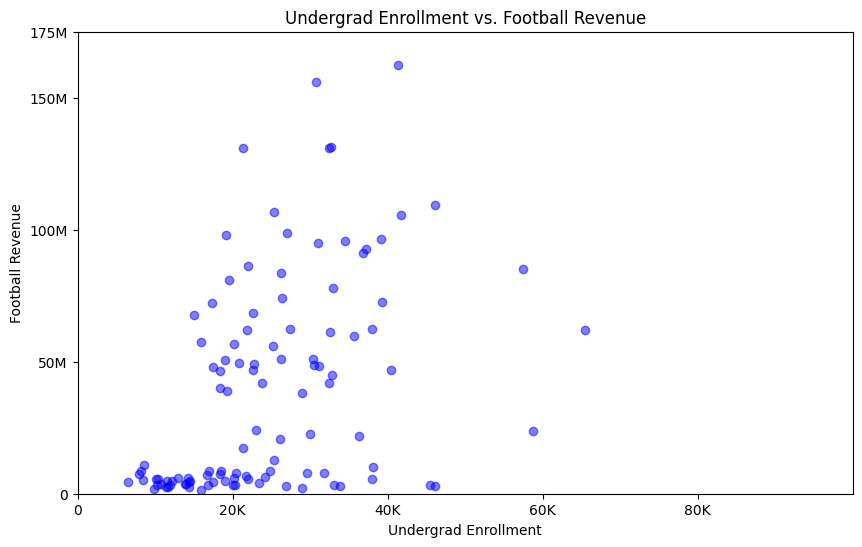

In [139]:
#Undergrad Enrollment vs. Football Revenue
x = df['Undergrad Enrollment']
y = df['Football Revenue']

plt.figure(figsize=(10, 6))
plt.scatter(x, y, marker='o', color='b', alpha=0.5)
plt.title('Undergrad Enrollment vs. Football Revenue')
plt.xlabel('Undergrad Enrollment')
plt.ylabel('Football Revenue')

plt.xlim(0, 100000)
plt.ylim(0, 165000000)

x_tick_positions = [0, 20000, 40000, 60000, 80000]
x_tick_labels = ["0", "20K", "40K", "60K", "80K"]
plt.xticks(x_tick_positions, x_tick_labels)

y_tick_positions = [0, 50000000, 100000000, 150000000, 175000000]
y_tick_labels = ["0", "50M", "100M", "150M", '175M']
plt.yticks(y_tick_positions, y_tick_labels)

print(x.corr(df['Football Revenue']))
plt.show()


0.7121711093633518


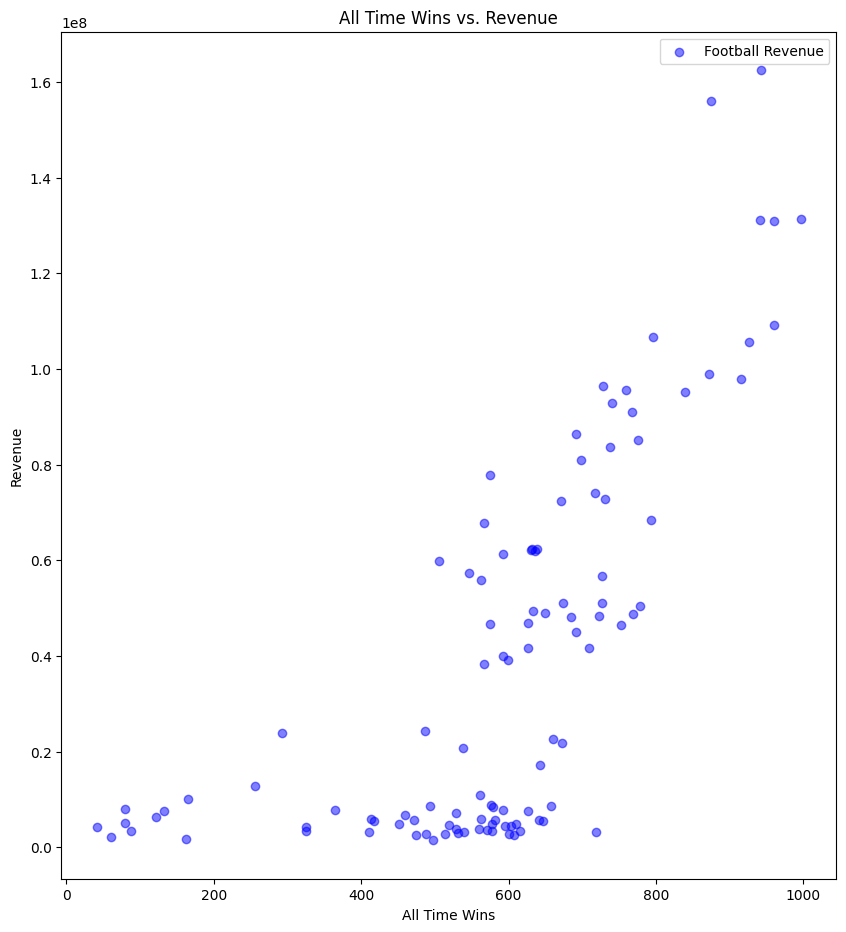

In [140]:
#All Time Wins vs. Revenue
x = df['All Time Wins']
y = df['Football Revenue']
plt.figure(figsize=(10, 11))
plt.scatter(x, y, marker='o', color='b', alpha=0.5, label='Football Revenue')

plt.title('All Time Wins vs. Revenue')
plt.xlabel('All Time Wins')
plt.ylabel('Revenue')
plt.legend()

print(x.corr(df['Football Revenue']))
plt.show()

Correlation coefficient of Basketball & Football Revenue: 0.7485436589804211


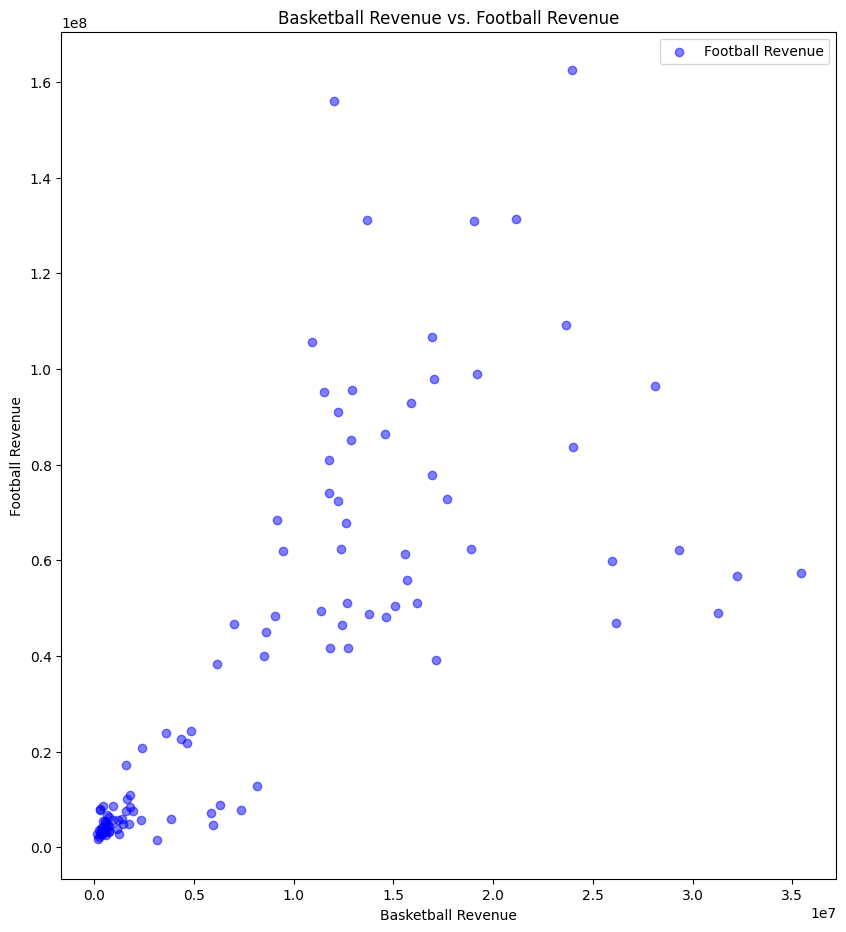

In [141]:
#Basketball Revenue vs. Football Revenue
x = df['Basketball Revenue']
y = df['Football Revenue']
plt.figure(figsize=(10, 11))
plt.scatter(x, y, marker='o', color='b', alpha=0.5, label='Football Revenue')

plt.title('Basketball Revenue vs. Football Revenue')
plt.xlabel('Basketball Revenue')
plt.ylabel('Football Revenue')
plt.legend()

print("Correlation coefficient of Basketball & Football Revenue:", x.corr(y))
plt.show()

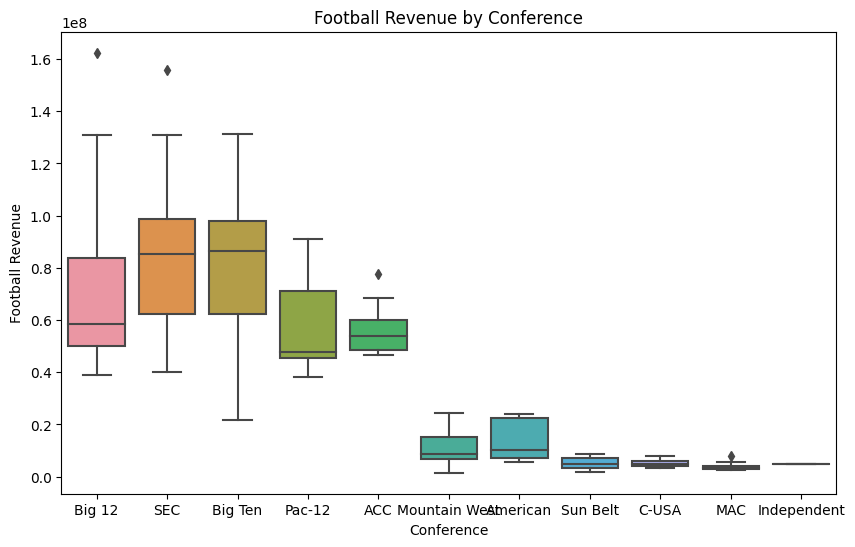

In [142]:
#Box Plots of Football Revenue By Conference
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Conference', y='Football Revenue')
plt.title('Football Revenue by Conference')
plt.xlabel('Conference')
plt.ylabel('Football Revenue')
plt.show()

In [143]:
#Label Encoding "Conference" column
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Conference_Label'] = label_encoder.fit_transform(df['Conference'])


In [145]:
#Dropping irrelevant or too-highly coorelated variables
df = df.drop(['Football Profit','Football Attendence','Football Expenses','% Fraternity', '% Sorority', 'School', 'Rank','Conference','% Greek','State','City','Years Played','Wins/Years','State GDP M','Win Rate'], axis = 1)

In [146]:
#Min/Max Scaling Continuous Variables
continuous_vars = ['Basketball Profit','Basketball Expenses','Basketball Revenue','Undergrad Enrollment','Stadium Size','Average Ticket Price', 'GDP Per Capita','Conference_Label']
minVec = df[continuous_vars].min().copy()
maxVec = df[continuous_vars].max().copy()
df[continuous_vars] = (df[continuous_vars]-minVec)/(maxVec-minVec)
df.columns

Index(['Football Revenue', 'Undergrad Enrollment', 'Stadium Size',
       'Basketball Revenue', 'Basketball Profit', 'Basketball Expenses',
       'All Time Wins', 'Average Ticket Price', 'GDP Per Capita',
       'Conference_Label'],
      dtype='object')

In [147]:
df_train , df_test = df, df
df_train = df_train.sample(frac=0.8,random_state=200)
df_test = df_test.drop(df_train.index)

In [148]:
X_train = df_train.drop(['Football Revenue'],axis = 1)
Y_train = df_train['Football Revenue']
X_test = df_test.drop(['Football Revenue'],axis = 1)
Y_test = df_test['Football Revenue']
X_train.columns

Index(['Undergrad Enrollment', 'Stadium Size', 'Basketball Revenue',
       'Basketball Profit', 'Basketball Expenses', 'All Time Wins',
       'Average Ticket Price', 'GDP Per Capita', 'Conference_Label'],
      dtype='object')

In [149]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

param_grid = {'fit_intercept': [True, False]}
linear_reg_Grid = GridSearchCV(LinearRegression(), param_grid, cv=10, refit=True, verbose=0)
linear_reg_Grid.fit(df_train.loc[:, df_train.columns != 'Football Revenue'], df_train['Football Revenue'])

best_model = linear_reg_Grid.best_estimator_

y_pred = best_model.predict(df_test.loc[:, df_test.columns != 'Football Revenue'])

r2 = r2_score(df_test['Football Revenue'], y_pred)
mae = mean_absolute_error(df_test['Football Revenue'], y_pred)
mse = mean_squared_error(df_test['Football Revenue'], y_pred)

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.7761709411887717
Mean Absolute Error: 14159528.065718679
Mean Squared Error: 457080939043923.8


In [151]:
from sklearn.linear_model import Ridge

# Create and fit the model with regularization strength alpha
model = Ridge(alpha=1.0, max_iter=10000)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

r2 = r2_score(df_test['Football Revenue'], y_pred)
mae = mean_absolute_error(df_test['Football Revenue'], y_pred)
mse = mean_squared_error(df_test['Football Revenue'], y_pred)

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.75283327610353
Mean Absolute Error: 14677158.054717487
Mean Squared Error: 504738745089792.56


In [152]:
from sklearn.linear_model import LassoCV, Lasso

lasso_cv = LassoCV(alphas=[0.1, 0.5, 1.0, 10, 50, 100], cv=5, max_iter=100000)
lasso_cv.fit(X_train, Y_train)

best_alpha = lasso_cv.alpha_

model = Lasso(alpha=best_alpha)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

r2 = r2_score(df_test['Football Revenue'], y_pred)
mae = mean_absolute_error(df_test['Football Revenue'], y_pred)
mse = mean_squared_error(df_test['Football Revenue'], y_pred)

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.7761709378680292
Mean Absolute Error: 14159527.758672195
Mean Squared Error: 457080945825206.5


In [153]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

elasticnet_cv = ElasticNetCV(alphas=[0.1, 1.0, 10, 50, 100], l1_ratio=[0.1, 0.5, 0.7, 0.9], cv=5, max_iter=100000)
elasticnet_cv.fit(X_train, Y_train)

best_alpha = elasticnet_cv.alpha_
best_l1_ratio = elasticnet_cv.l1_ratio_

model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=100000)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

r2 = r2_score(df_test['Football Revenue'], y_pred)
mae = mean_absolute_error(df_test['Football Revenue'], y_pred)
mse = mean_squared_error(df_test['Football Revenue'], y_pred)

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.7551279326738829
Mean Absolute Error: 14578237.46890244
Mean Squared Error: 500052830823205.9


In [154]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)
y_pred = decision_tree.predict(X_test)

r2 = r2_score(df_test['Football Revenue'], y_pred)
mae = mean_absolute_error(df_test['Football Revenue'], y_pred)
mse = mean_squared_error(df_test['Football Revenue'], y_pred)

print(f"Decision Tree R-squared: {r2}")
print(f"Decision Tree Mean Absolute Error: {mae}")
print(f"Decision Tree Mean Squared Error: {mse}")

random_forest = RandomForestRegressor(n_estimators=100, random_state=0)
random_forest.fit(X_train, Y_train)
y_pred = random_forest.predict(X_test)

r2 = r2_score(df_test['Football Revenue'], y_pred)
mae = mean_absolute_error(df_test['Football Revenue'], y_pred)
mse = mean_squared_error(df_test['Football Revenue'], y_pred)
print(f"Random Forest R-squared: {r2}")
print(f"Random Forest Mean Absolute Error: {mae}")
print(f"Random Forest Mean Squared Error: {mse}")

gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=0)
gradient_boosting.fit(X_train, Y_train)
y_pred = gradient_boosting.predict(X_test)

r2 = r2_score(df_test['Football Revenue'], y_pred)
mae = mean_absolute_error(df_test['Football Revenue'], y_pred)
mse = mean_squared_error(df_test['Football Revenue'], y_pred)

print(f"Gradient Boosting R-squared: {r2}")
print(f"Gradient Boosting Mean Absolute Error: {mae}")
print(f"Gradient Boosting Mean Squared Error: {mse}")

Decision Tree R-squared: 0.6629937549722904
Decision Tree Mean Absolute Error: 17016129.285714287
Decision Tree Mean Squared Error: 688199877884689.1
Random Forest R-squared: 0.8360588736005427
Random Forest Mean Absolute Error: 12328450.286190476
Random Forest Mean Squared Error: 334783894461980.0
Gradient Boosting R-squared: 0.8327749437530433
Gradient Boosting Mean Absolute Error: 11392390.062914703
Gradient Boosting Mean Squared Error: 341490001999676.1


In [155]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test)

param = {'max_depth': 3,'eta': 0.1,'objective': 'reg:squarederror','eval_metric': 'rmse','subsample': 0.8,      'colsample_bytree': 0.8,  }

bst = xgb.train(param, dtrain, num_boost_round=100)
y_pred = bst.predict(dtest)

r2 = r2_score(df_test['Football Revenue'], y_pred)
mae = mean_absolute_error(df_test['Football Revenue'], y_pred)
mse = mean_squared_error(df_test['Football Revenue'], y_pred)

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.8160124215205445
Mean Absolute Error: 11236071.13095238
Mean Squared Error: 375720720046151.7


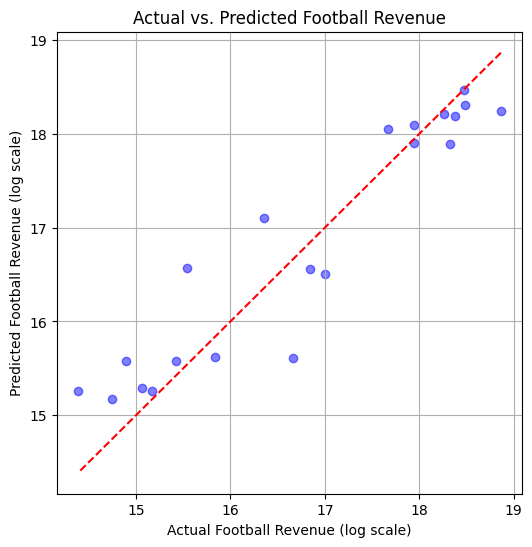

In [156]:
x=np.log(df_test['Football Revenue'])
y=np.log(y_pred)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, marker='o', color='b', alpha=0.5, label='Football Revenue')
plt.plot(x, x, color='r', linestyle='--', label='y = x')

plt.xlabel('Actual Football Revenue (log scale)')
plt.ylabel('Predicted Football Revenue (log scale)')
plt.title('Actual vs. Predicted Football Revenue')

plt.grid()
plt.show()

In [171]:
dfUCSB = pd.read_csv("/kaggle/input/ucsb-info/UCSB Info - Sheet1.csv")
dtrain = xgb.DMatrix(df.drop(['Football Revenue'],axis = 1), label=df['Football Revenue'])
dfinal = xgb.DMatrix(dfUCSB)

param = {'max_depth': 3,'eta': 0.1,'objective': 'reg:squarederror','eval_metric': 'rmse','subsample': 0.8,      'colsample_bytree': 0.8,  }

bst = xgb.train(param, dtrain, num_boost_round=100)
y_pred = bst.predict(dfinal)

print("Predicted Revenue Generated by UCSB Football Program: $",y_pred[0])

Predicted Revenue Generated by UCSB Football Program: $ 61683012.0
